<a href="https://colab.research.google.com/github/kundan2403/ml-algo/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
feature_names = iris.feature_names

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(X, columns=feature_names)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

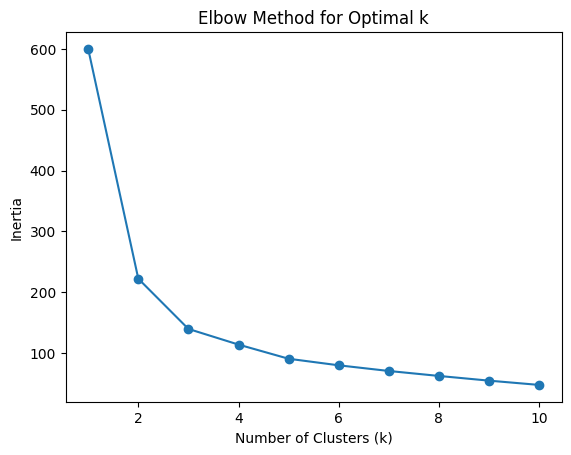

In [7]:
# Function to calculate inertia for different values of k
def calculate_inertia(k_values, X):
    inertias = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
    return inertias

# Define range of k values
k_values = range(1, 11)

# Calculate inertia for each value of k
inertias = calculate_inertia(k_values, X_scaled)

# Plotting the Elbow method
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Function to calculate Dunn Index
def calculate_dunn_index(X, labels):
    dunn_index = np.min(pdist(X)) / np.max([np.max(pdist(X[labels == label])) for label in np.unique(labels)])
    return dunn_index

# Function to calculate Davies Bouldin Index
def calculate_davies_bouldin_index(X, labels):
    db_index = davies_bouldin_score(X, labels)
    return db_index

# Choose the optimal value of k (e.g., from Elbow method)
optimal_k = 3

# Apply KMeans clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Calculate Dunn Index and Davies Bouldin Index
dunn_index = calculate_dunn_index(X_scaled, cluster_labels)
db_index = calculate_davies_bouldin_index(X_scaled, cluster_labels)

print(f"Dunn Index for {optimal_k} clusters: {dunn_index}")
print(f"Davies Bouldin Index for {optimal_k} clusters: {db_index}")

Dunn Index for 3 clusters: 0.0
Davies Bouldin Index for 3 clusters: 0.8335949464754338


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score for {optimal_k} clusters: {silhouette_avg}")

Silhouette Score for 3 clusters: 0.45994823920518635


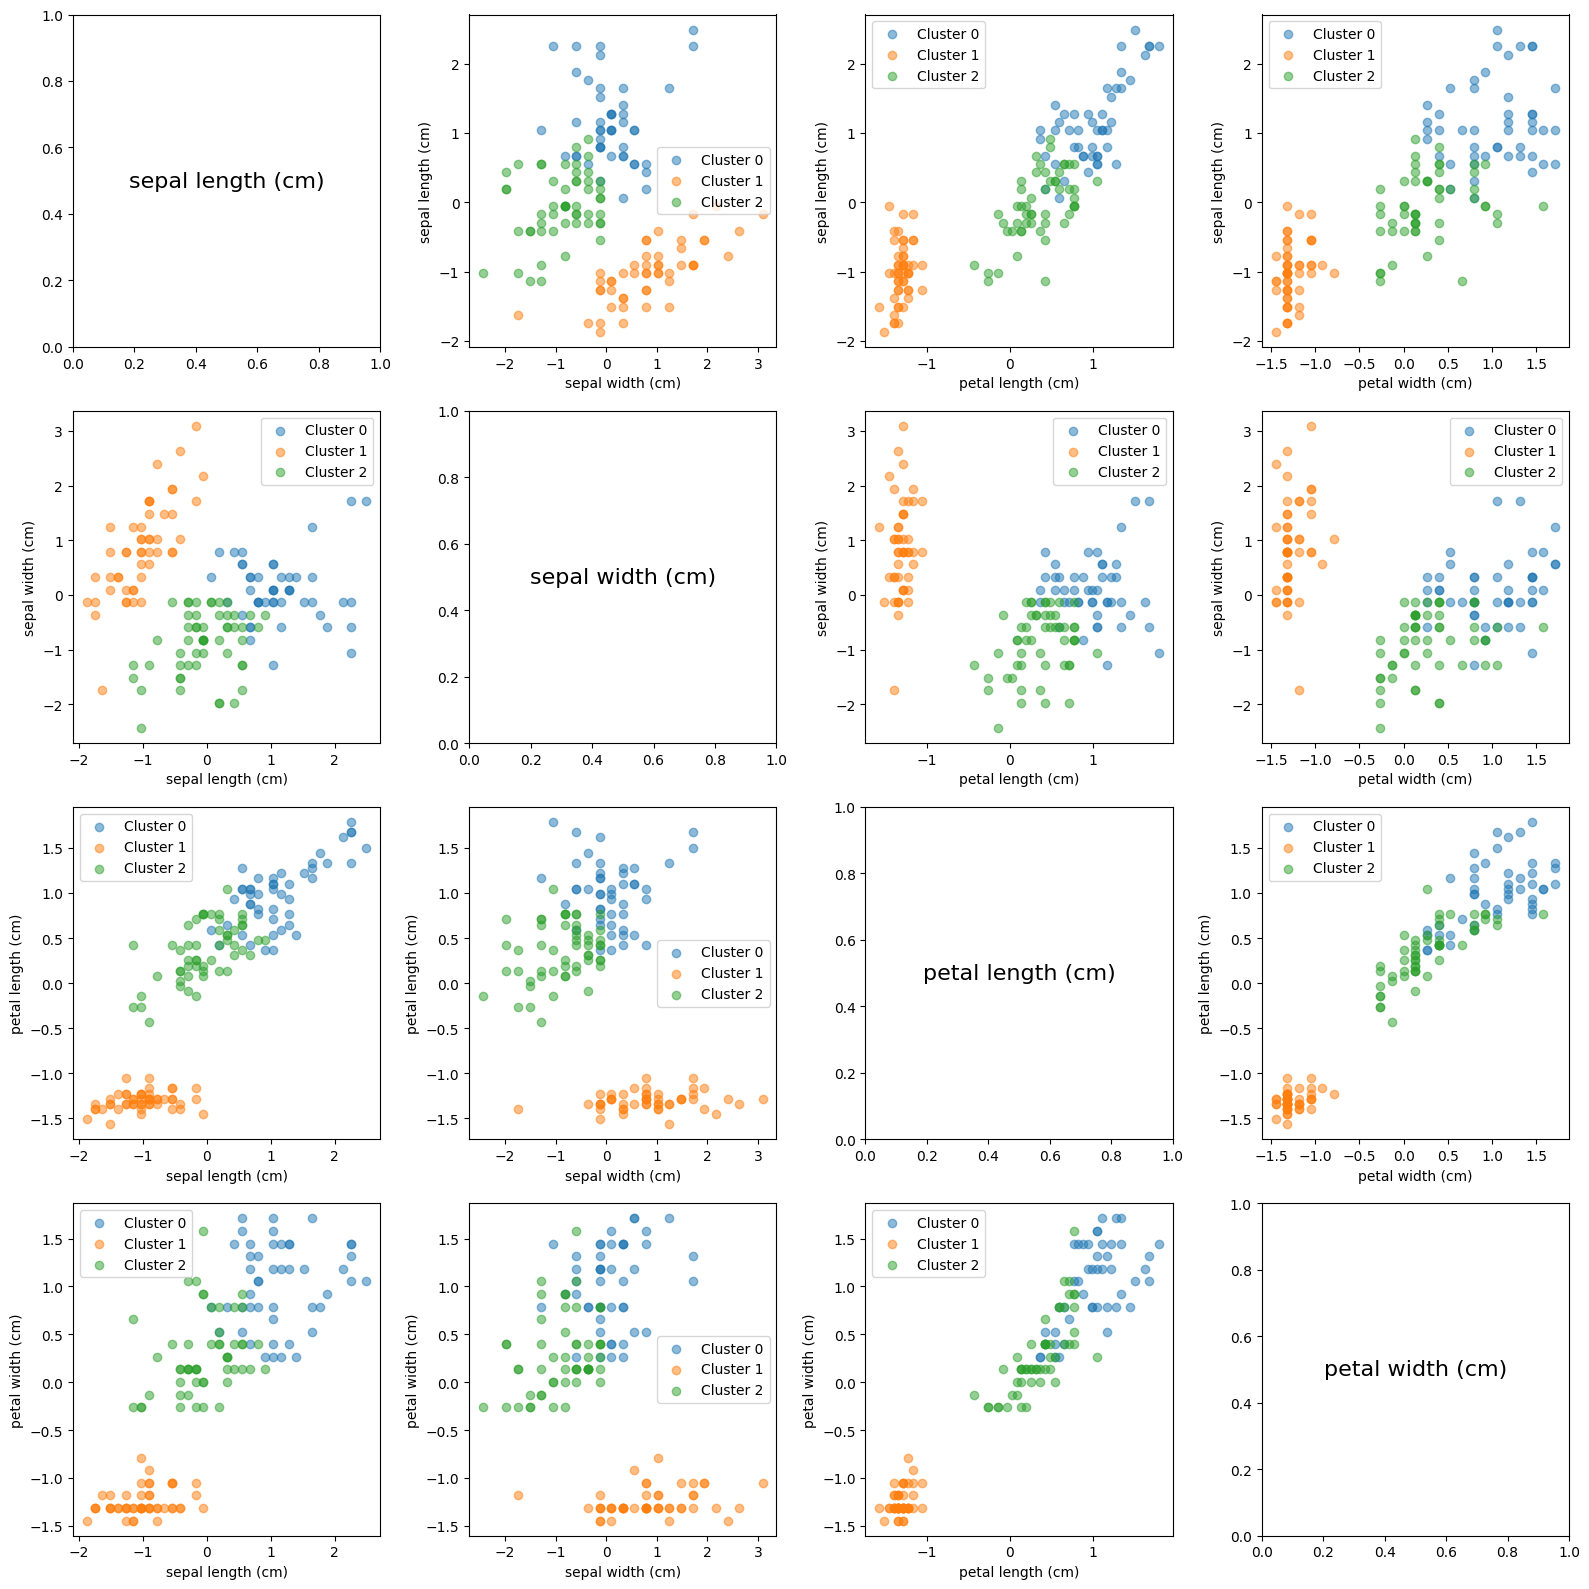

In [12]:
# Function to plot cluster distributions for each feature pair
def plot_cluster_distributions(X, labels, feature_names):
    n_features = X.shape[1]
    fig, axes = plt.subplots(n_features, n_features, figsize=(4*n_features, 4*n_features))

    for i in range(n_features):
        for j in range(n_features):
            if i == j:
                axes[i, j].text(0.5, 0.5, feature_names[i], ha='center', va='center', fontsize=16)
            else:
                for cluster in np.unique(labels):
                    axes[i, j].scatter(X[labels == cluster, j], X[labels == cluster, i], label=f'Cluster {cluster}', alpha=0.5)
                axes[i, j].set_xlabel(feature_names[j])
                axes[i, j].set_ylabel(feature_names[i])
                axes[i, j].legend()

    plt.tight_layout()
    plt.show()

# Plot cluster distributions for each feature pair
plot_cluster_distributions(X_scaled, cluster_labels, feature_names)
plt.show()